In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14



In [2]:
import numpy as np
import pandas as pd
import glob

In [3]:
from gi import histoplot, scatter_xy, scatter_xyze, plot_time, plot_amplitude
from gi import event_size, event_edep, event_mult, event_class, fiducial_df, twocluster_df, add_distances, three_cluster_df
from controlHistos import read_histograms, plot_histogram
from imgs import select_image_from_df, select_image_from_df3, plot_image, select_event, plot_event

## Control Histograms
- Read control histogram file and plot control histograms

In [6]:
rootdir = "/Users/jjgomezcadenas/Data/G4Prods/crystalGI/G4BGO"
filenm = "control_histograms_bgo_1.txt"

In [7]:
chist = read_histograms(f"{rootdir}/{filenm}")

In [8]:
chist.keys()

dict_keys(['Charge', 'DecayTime', 'EDEP', 'STEPL', 'TimeBin', 'TotalEnergy', 'TotalEnergyFirstTimeBin', 'X0', 'Y0', 'Z0'])

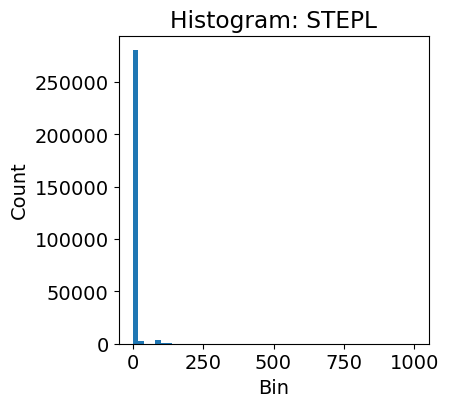

In [9]:
plot_histogram(chist, 'STEPL', figsize=(4, 4))

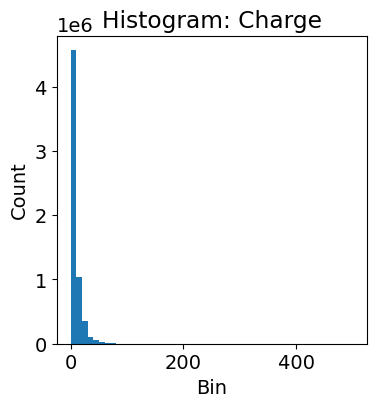

In [10]:
plot_histogram(chist, 'Charge', figsize=(4, 4))

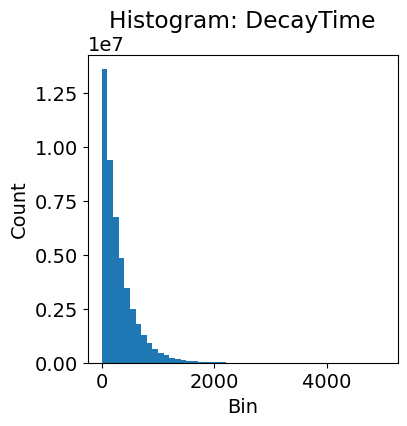

In [11]:
plot_histogram(chist, 'DecayTime', figsize=(4, 4))

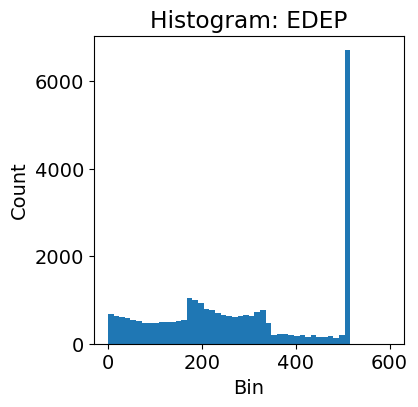

In [12]:
plot_histogram(chist, 'EDEP', figsize=(4, 4))

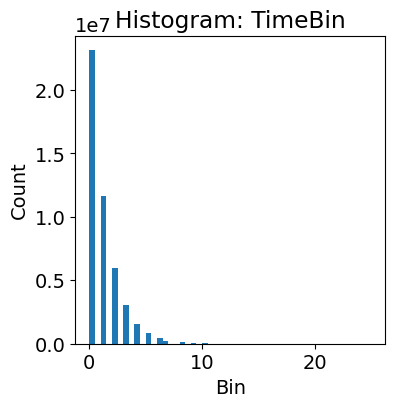

In [13]:
plot_histogram(chist, 'TimeBin', figsize=(4, 4))

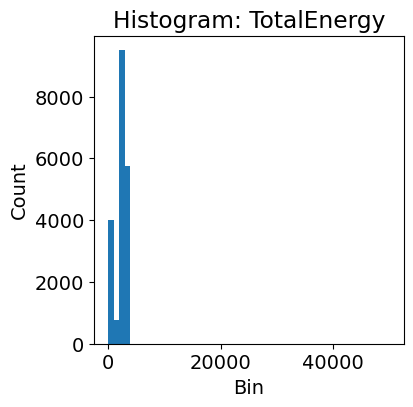

In [14]:
plot_histogram(chist, 'TotalEnergy', figsize=(4, 4))

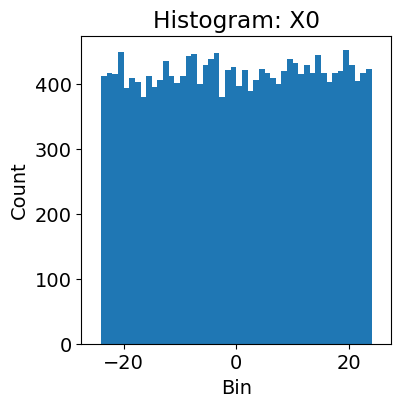

In [15]:
plot_histogram(chist, 'X0', figsize=(4, 4))

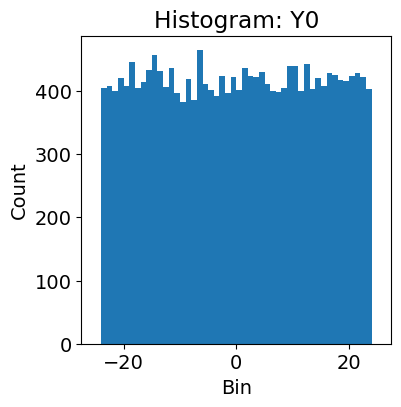

In [16]:
plot_histogram(chist, 'Y0', figsize=(4, 4))

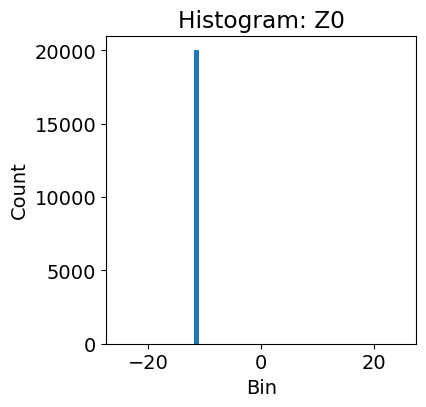

In [17]:
plot_histogram(chist, 'Z0', figsize=(4, 4))

## Read metadata

In [59]:
48/4

12.0

In [60]:
48/6

8.0

## Read gamma interaction file

In [20]:
filenm = "global_pars_1.csv"

In [21]:
dfgp = pd.read_csv(f"{rootdir}/{filenm}", header=0)

In [22]:
dfgp

,seed,timeBinning,gammaEnergy,crystalWidth,crystalLength,material,sipmXY,numberOfEvents
0,12340002,200,0.511,48,22.4,BGO,6,20000


In [23]:
cw = dfgp.crystalWidth.values[0]
cl = dfgp.crystalLength.values[0]
nn = dfgp.numberOfEvents.values[0]
ge = dfgp.gammaEnergy.values[0]

In [24]:
filenm = "gamma_interactions_bgo_1.csv"

In [25]:
df = pd.read_csv(f"{rootdir}/{filenm}", header=0).sort_values(by='event')

In [26]:
df.head(10)

,event,time,x,y,z,edep
0,0,20.3,20.2,-6.4,-5.0,297.7
4,0,24.4,19.0,-6.5,-5.5,213.3
20,1,62.8,-9.5,-17.9,7.6,506.3
19,1,11.1,-10.1,-19.9,-7.8,4.7
33,2,52.8,8.6,-21.6,4.7,511.0
49,3,50.0,2.0,-20.7,3.8,441.6
48,3,48.5,1.9,-20.9,3.5,69.4
68,4,44.9,8.9,-4.6,0.1,178.8
67,4,40.8,9.2,-4.0,1.1,332.2
86,5,37.3,0.6,11.5,0.1,511.0


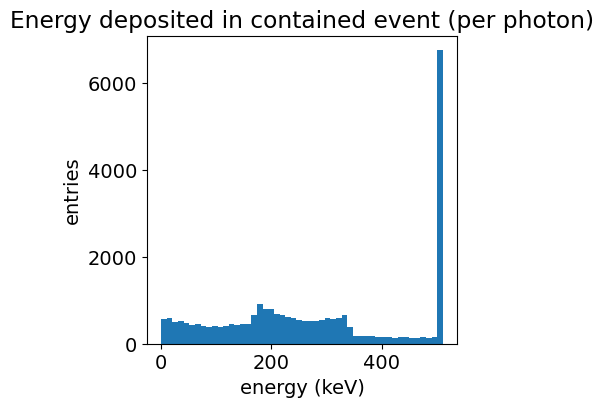

In [32]:
b, e = histoplot(df.edep, 'energy (keV)', "entries", bins=50, figsize=(6,6),
                title="Energy deposited in contained event (per photon)")

In [29]:
b

array([1404., 1273., 1083., 1015., 1022., 1108., 1593., 2043., 1656.,
       1454., 1337., 1376., 1493.,  891.,  467.,  393.,  369.,  373.,
        360., 6962.])

In [30]:
e

array([  0.  ,  25.55,  51.1 ,  76.65, 102.2 , 127.75, 153.3 , 178.85,
       204.4 , 229.95, 255.5 , 281.05, 306.6 , 332.15, 357.7 , 383.25,
       408.8 , 434.35, 459.9 , 485.45, 511.  ])

In [34]:
print(f"Fraction of photoelectric = {(b[-1]/np.sum(b)):.2f}")

Fraction of photoelectric = 0.24


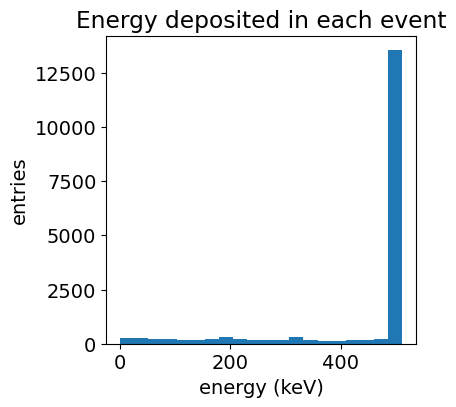

In [35]:
b, e = histoplot(event_edep(df), 'energy (keV)', "entries", bins=20, figsize=(6,6),
                title="Energy deposited in each event")

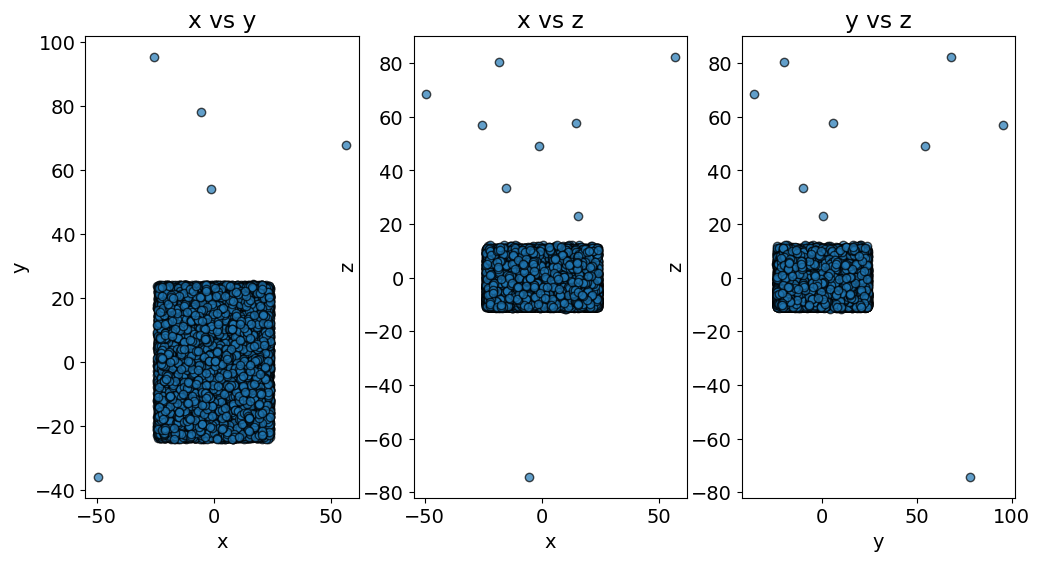

In [36]:
scatter_xy(df, figsize=(12, 6))

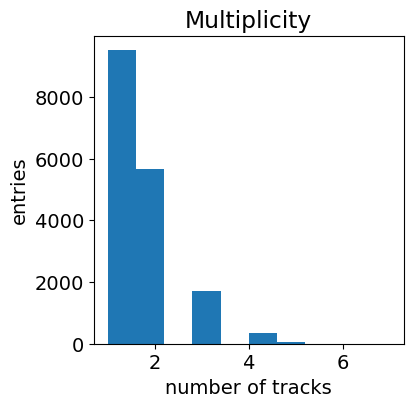

In [37]:
b, e = histoplot(event_mult(df), 'number of tracks', "entries", bins=10, figsize=(6,6),
                title="Multiplicity")

In [38]:
x_int = event_size(df)/nn

In [39]:
print(f"fraction of events interacting in crystal = {x_int}")

fraction of events interacting in crystal = 0.86495


### Define a fiducial dataframe
- cut events where motherid not 1
- Impose to be inside crystal dimensions
- Tracklength less than 1 mm.
- add total energy and number of particles in the event
- remove mass and motherid (its alwasy e-,  and 1)

In [40]:
dfx = fiducial_df(df, d=cw, z=cl)

In [41]:
dfx.head(10)

,event,time,x,y,z,edep,etot,ntrk
0,0,20.3,20.2,-6.4,-5.0,297.7,511.0,2
1,0,24.4,19.0,-6.5,-5.5,213.3,511.0,2
2,1,62.8,-9.5,-17.9,7.6,506.3,511.0,2
3,1,11.1,-10.1,-19.9,-7.8,4.7,511.0,2
4,2,52.8,8.6,-21.6,4.7,511.0,511.0,1
5,3,50.0,2.0,-20.7,3.8,441.6,511.0,2
6,3,48.5,1.9,-20.9,3.5,69.4,511.0,2
7,4,44.9,8.9,-4.6,0.1,178.8,511.0,2
8,4,40.8,9.2,-4.0,1.1,332.2,511.0,2
9,5,37.3,0.6,11.5,0.1,511.0,511.0,1


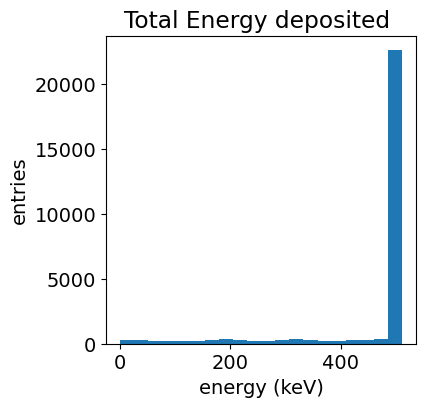

In [42]:
b, e = histoplot(dfx.etot, 'energy (keV)', "entries", bins=20, figsize=(6,6),
                title="Total Energy deposited ")

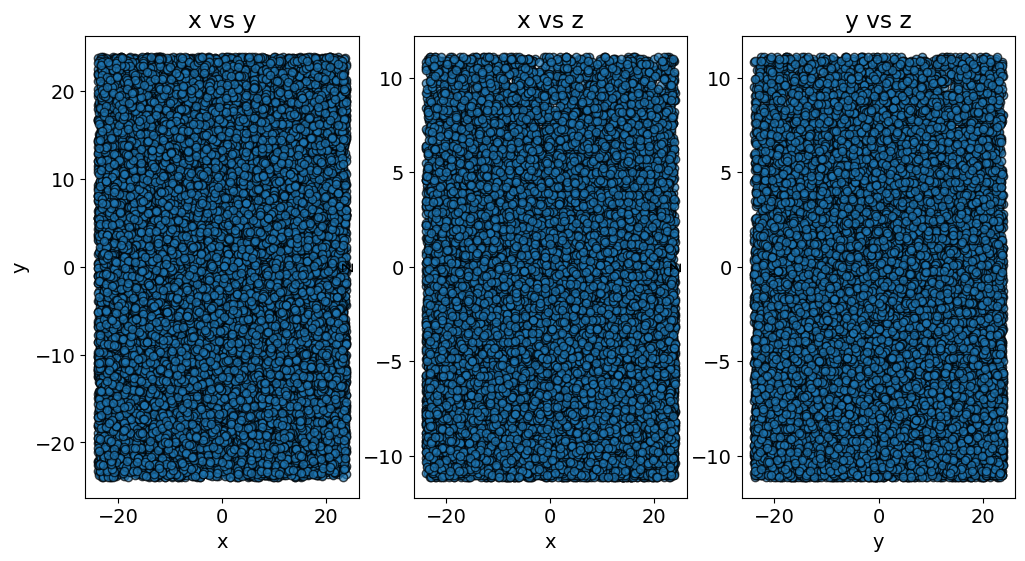

In [43]:
scatter_xy(dfx, figsize=(12, 6))

In [44]:
event_size(dfx)/event_size(df)

0.9953754552286259

### Cut in energy
- Only events with energy near the photopeak are relevant

In [45]:
ec = 0.98 *ge*1000 # in keV
print(f"cutoff energy = {ec:.2f}")
dfe = dfx[dfx.etot>ec] # As an example, in practice resolution depends on crystal

cutoff energy = 500.78


In [46]:
dfe.head(10)

,event,time,x,y,z,edep,etot,ntrk
0,0,20.3,20.2,-6.4,-5.0,297.7,511.0,2
1,0,24.4,19.0,-6.5,-5.5,213.3,511.0,2
2,1,62.8,-9.5,-17.9,7.6,506.3,511.0,2
3,1,11.1,-10.1,-19.9,-7.8,4.7,511.0,2
4,2,52.8,8.6,-21.6,4.7,511.0,511.0,1
5,3,50.0,2.0,-20.7,3.8,441.6,511.0,2
6,3,48.5,1.9,-20.9,3.5,69.4,511.0,2
7,4,44.9,8.9,-4.6,0.1,178.8,511.0,2
8,4,40.8,9.2,-4.0,1.1,332.2,511.0,2
9,5,37.3,0.6,11.5,0.1,511.0,511.0,1


In [48]:
x_e = event_size(dfe)/nn
print(f"fraction of events with e > {ec:.1f} keV = {x_e}")

fraction of events with e > 500.8 keV = 0.6655


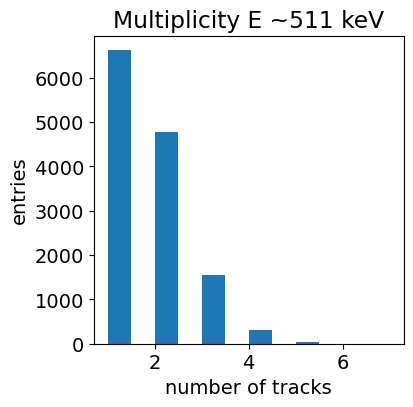

In [49]:
b, e = histoplot(event_mult(dfe), 'number of tracks', "entries", bins=12, figsize=(6,6),
                title="Multiplicity E ~511 keV")

### Create a two-cluster df

In [50]:
df2c = twocluster_df(dfe)

In [51]:
add_distances(df2c)

In [52]:
df2c.head(10)

,index,event,etot,ntrk,t1,x1,y1,z1,e1,t2,...,e2,x12,y12,z12,xb,yb,zb,d12,d12b,d1b
0,0,0,511.0,2,20.3,20.2,-6.4,-5.0,297.7,24.4,...,213.3,19.699100,-6.441742,-5.208708,19.699100,-6.441742,-5.208708,1.303840,0.0,0.544245
1,1,1,511.0,2,11.1,-10.1,-19.9,-7.8,4.7,62.8,...,506.3,-9.505519,-17.918395,7.458356,-9.505519,-17.918395,7.458356,15.540914,0.0,15.397974
2,2,2,511.0,1,52.8,8.6,-21.6,4.7,511.0,52.8,...,511.0,8.600000,-21.600000,4.700000,8.600000,-21.600000,4.700000,0.000000,0.0,0.000000
3,3,3,511.0,2,48.5,1.9,-20.9,3.5,69.4,50.0,...,441.6,1.986419,-20.727162,3.759256,1.986419,-20.727162,3.759256,0.374166,0.0,0.323349
4,4,4,511.0,2,40.8,9.2,-4.0,1.1,332.2,44.9,...,178.8,9.095029,-4.209941,0.750098,9.095029,-4.209941,0.750098,1.204159,0.0,0.421338
5,5,5,511.0,1,37.3,0.6,11.5,0.1,511.0,37.3,...,511.0,0.600000,11.500000,0.100000,0.600000,11.500000,0.100000,0.000000,0.0,0.000000
6,6,6,511.0,1,5.5,7.3,1.1,-9.4,511.0,5.5,...,511.0,7.300000,1.100000,-9.400000,7.300000,1.100000,-9.400000,0.000000,0.0,0.000000
7,7,8,511.0,1,3.2,-17.6,-23.4,-10.1,511.0,3.2,...,511.0,-17.600000,-23.400000,-10.100000,-17.600000,-23.400000,-10.100000,0.000000,0.0,0.000000
8,8,9,511.0,2,44.5,21.4,19.2,2.2,338.7,49.7,...,172.3,21.231409,19.200000,1.694227,21.231409,19.200000,1.694227,1.581139,0.0,0.533132
9,9,10,511.0,1,10.3,-14.2,1.7,-8.0,511.0,10.3,...,511.0,-14.200000,1.700000,-8.000000,-14.200000,1.700000,-8.000000,0.000000,0.0,0.000000


In [54]:
dfpe = df2c[df2c.ntrk==1]
dfco = df2c[df2c.ntrk>1]
print(f"Fraction of photoelectric events  = {event_size(dfpe)/event_size(df2c)}, of compton = {event_size(dfco)/event_size(df2c)}")
print(f"wrt total phe  = {event_size(dfpe)/nn}, compton = {event_size(dfco)/nn}")

Fraction of photoelectric events  = 0.49729526671675434, of compton = 0.5027047332832457
wrt total phe  = 0.33095, compton = 0.33455


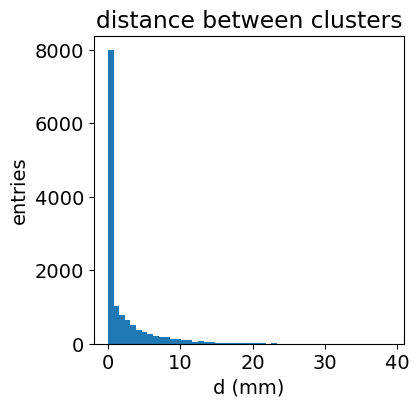

In [55]:
b, e = histoplot(df2c.d12, 'd (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between clusters")

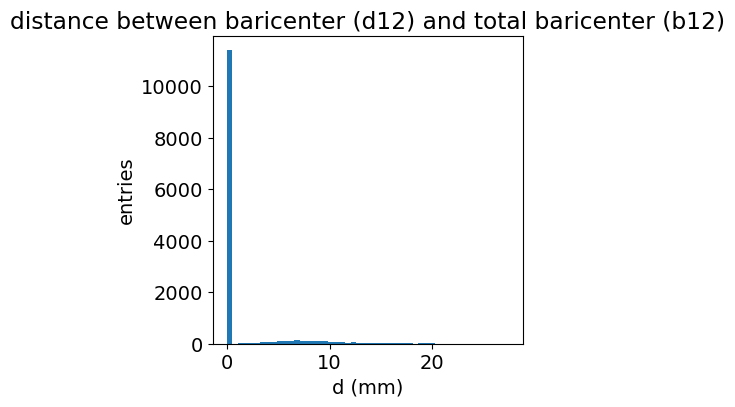

In [56]:
b, e = histoplot(df2c.d12b, 'd (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between baricenter (d12) and total baricenter (b12)")

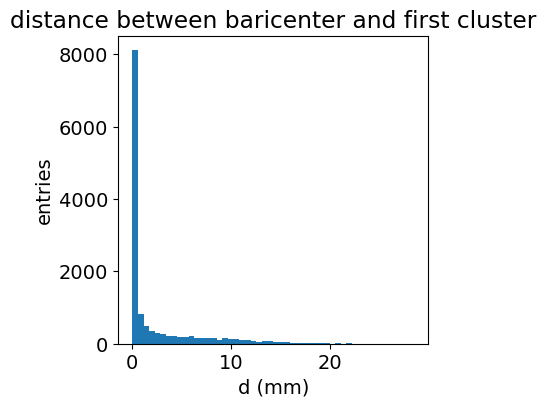

In [57]:
b, e = histoplot(df2c.d1b, 'd (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between baricenter and first cluster")

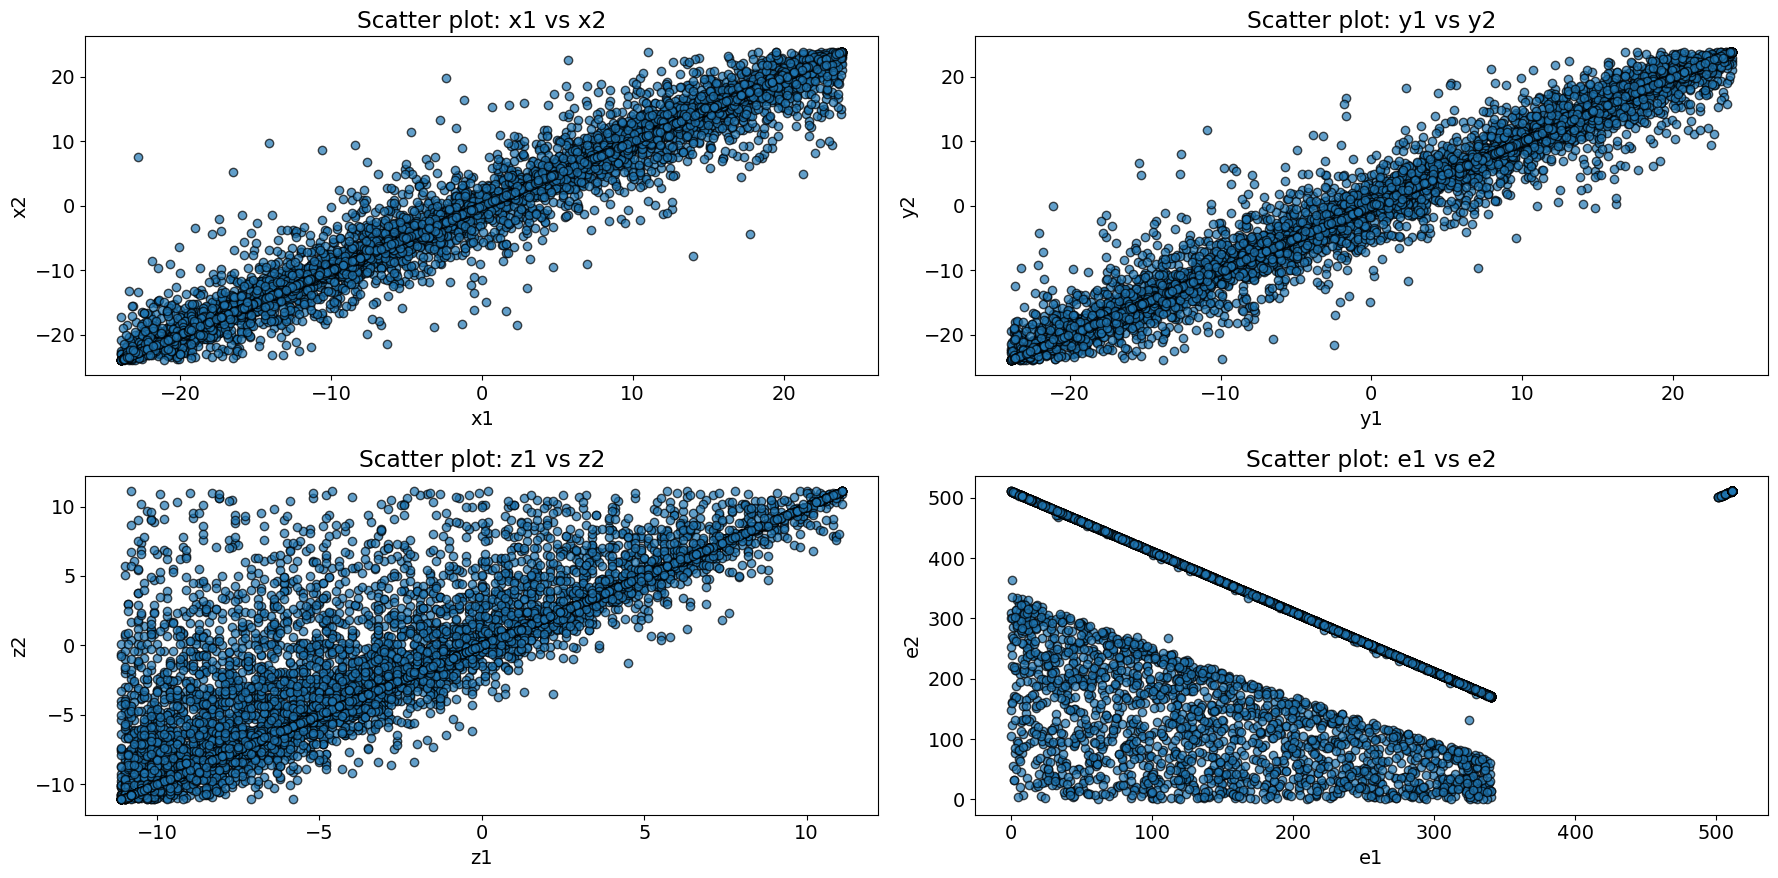

In [58]:
scatter_xyze(df2c)

## Optical photons

### Sensor data

In [61]:
filenm = "sensor_data_bgo_1.csv"

In [62]:
dfp = pd.read_csv(f"{rootdir}/{filenm}", header=0).sort_values(by='event')

In [63]:
dfp.head(10)

,event,sensor_id,time,charge
230,0,31,0,12
674,0,40,3,5
677,0,40,4,2
680,0,40,10,1
252,0,18,2,6
251,0,18,1,6
250,0,18,0,17
685,0,7,0,9
248,0,44,5,1
247,0,44,4,5


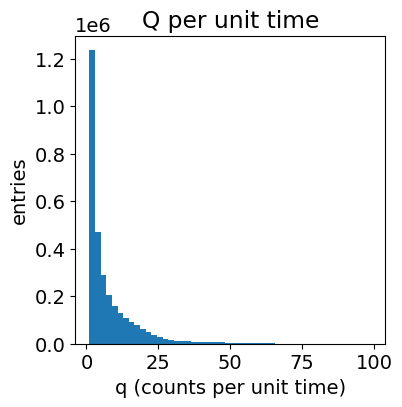

In [64]:
b, e = histoplot(dfp.charge[dfp.charge<100], 'q (counts per unit time)', "entries", bins=50, figsize=(6,6),
                title="Q per unit time")

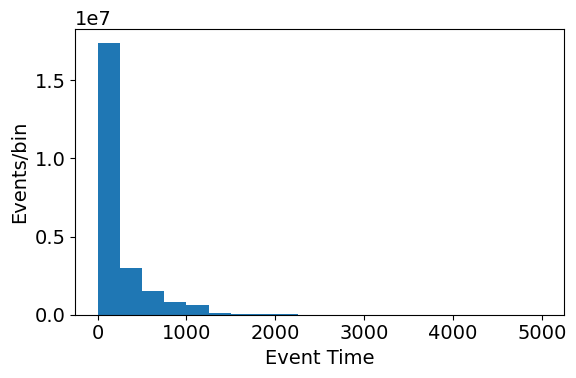

In [65]:
plot_time(dfp, num_bins = 20, xmin=0.0, xmax=5e+3, timebin=200, figsize=(6, 4), title="")

### Integrated sensor data

In [67]:
filenm = "isensor_data_bgo_1.csv"
dfi = pd.read_csv(f"{rootdir}/{filenm}", header=0).sort_values(by='event')

In [68]:
dfi.head(10)

,event,sensor_id,amplitude
190,0,25,38
98,0,1,24
164,0,10,38
192,0,24,27
90,0,59,103
87,0,32,35
86,0,58,88
171,0,21,27
172,0,41,77
82,0,28,31


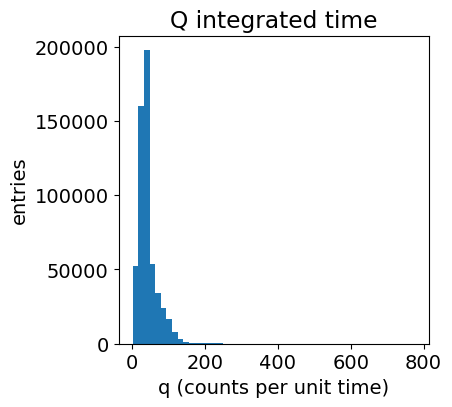

In [69]:
b, e = histoplot(dfi.amplitude[dfi.amplitude<2000], 'q (counts per unit time)', "entries", bins=50, figsize=(6,6),
                title="Q integrated time")

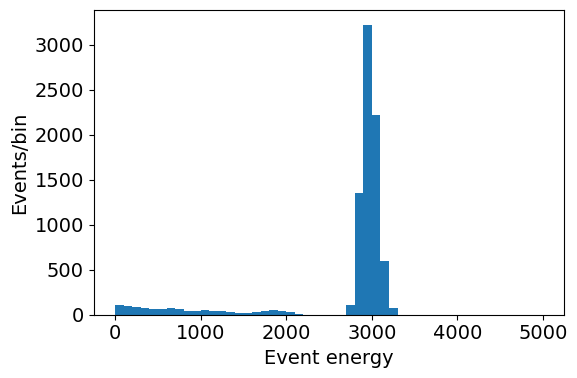

In [71]:
b, e = plot_amplitude(dfi, num_bins = 50, xmin=0, xmax=5e+3,figsize=(6, 4), title="")

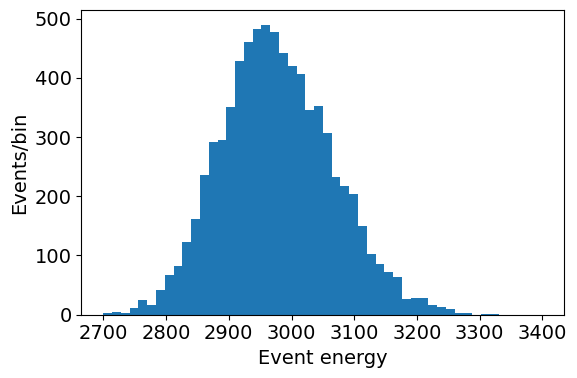

In [75]:
b, e = plot_amplitude(dfi, num_bins = 50, xmin=2700, xmax=3400,figsize=(6, 4), title="")

In [76]:
np.std(e)/np.mean(e)

0.06756538367682506

### Sensor positions

In [77]:
filenm = "sensor_positions.csv"
dfs = pd.read_csv(f"{rootdir}/{filenm}", header=0)

In [78]:
dfs.head(10)

,sensor_id,sensor_x,sensor_y,sensor_z
0,0,-21,-21,11.7
1,1,-21,-15,11.7
2,2,-21,-9,11.7
3,3,-21,-3,11.7
4,4,-21,3,11.7
5,5,-21,9,11.7
6,6,-21,15,11.7
7,7,-21,21,11.7
8,8,-15,-21,11.7
9,9,-15,-15,11.7


In [79]:
dfs.sensor_x.values

array([-21, -21, -21, -21, -21, -21, -21, -21, -15, -15, -15, -15, -15,
       -15, -15, -15,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -3,  -3,
        -3,  -3,  -3,  -3,  -3,  -3,   3,   3,   3,   3,   3,   3,   3,
         3,   9,   9,   9,   9,   9,   9,   9,   9,  15,  15,  15,  15,
        15,  15,  15,  15,  21,  21,  21,  21,  21,  21,  21,  21])

In [80]:
dfs.sensor_y.values

array([-21, -15,  -9,  -3,   3,   9,  15,  21, -21, -15,  -9,  -3,   3,
         9,  15,  21, -21, -15,  -9,  -3,   3,   9,  15,  21, -21, -15,
        -9,  -3,   3,   9,  15,  21, -21, -15,  -9,  -3,   3,   9,  15,
        21, -21, -15,  -9,  -3,   3,   9,  15,  21, -21, -15,  -9,  -3,
         3,   9,  15,  21, -21, -15,  -9,  -3,   3,   9,  15,  21])

## Images

In [81]:
x_spatial = dfs.sensor_x.values
y_spatial = dfs.sensor_y.values


### Plot a few events

In [82]:
evtsel = 0
charge_matrix = select_image_from_df(dfi,evtsel)


In [83]:
charge_matrix

array([[ 23.,  24.,  29.,  32.,  27.,  40.,  30.,  21.],
       [ 23.,  28.,  38.,  40.,  40.,  30.,  28.,  23.],
       [ 30.,  29.,  34.,  29.,  32.,  27.,  16.,  28.],
       [ 27.,  38.,  42.,  46.,  31.,  31.,  36.,  30.],
       [ 35.,  44.,  38.,  53.,  60.,  41.,  47.,  27.],
       [ 52.,  77.,  71.,  78.,  79.,  47.,  37.,  38.],
       [ 68.,  77., 107., 105.,  87.,  57.,  30.,  34.],
       [ 56.,  74.,  88., 103.,  70.,  49.,  38.,  25.]])

In [84]:
sel_events = df2c.event.values

xg1 = 20.2, yg1 =-6.4
xg2 = 20.2, yg2 =-6.4


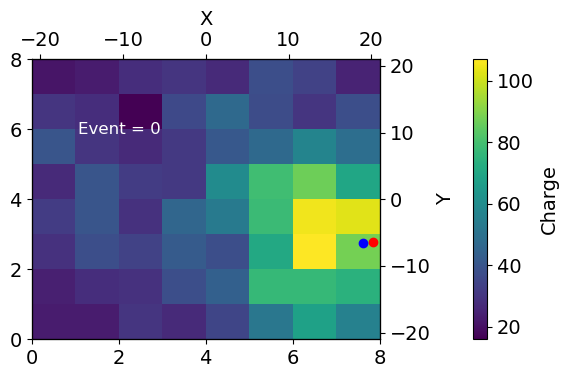

In [85]:
plot_image(dfi, df2c,  sel_events[0], x_spatial, y_spatial, figsize=(6, 4))

xg1 = -10.1, yg1 =-19.9
xg2 = -10.1, yg2 =-19.9


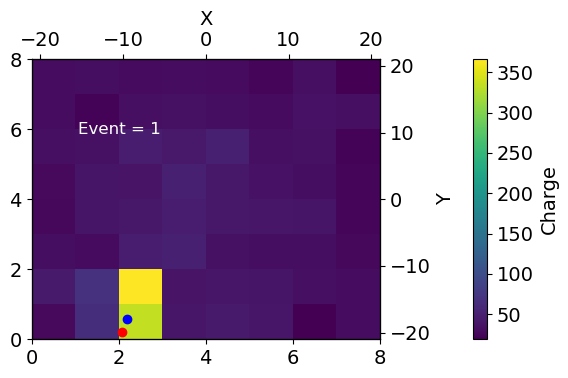

In [86]:
plot_image(dfi, df2c,  sel_events[1], x_spatial, y_spatial, figsize=(6, 4))

xg1 = 8.6, yg1 =-21.6
xg2 = 8.6, yg2 =-21.6


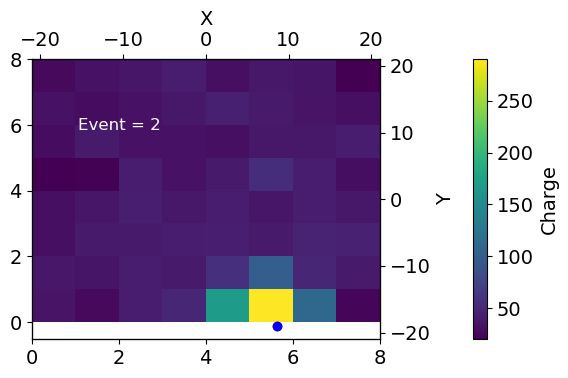

In [87]:
plot_image(dfi, df2c,  sel_events[2], x_spatial, y_spatial, figsize=(6, 4))

xg1 = 1.9, yg1 =-20.9
xg2 = 1.9, yg2 =-20.9


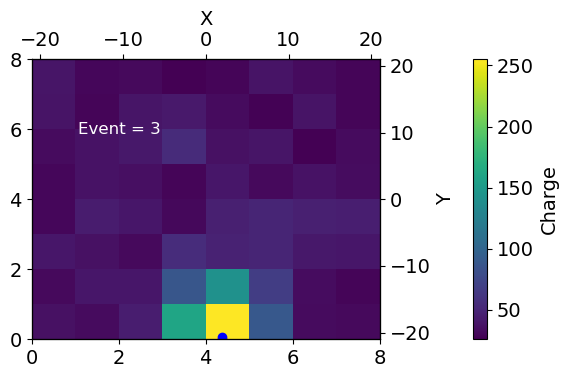

In [88]:
plot_image(dfi, df2c,  sel_events[3], x_spatial, y_spatial, figsize=(6, 4))

xg1 = -14.9, yg1 =-2.9
xg2 = -14.9, yg2 =-2.9


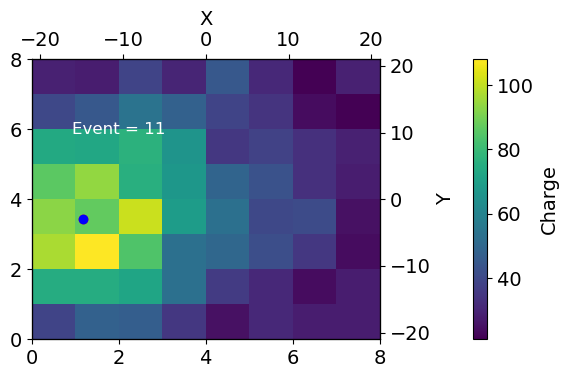

In [89]:
plot_image(dfi, df2c,  sel_events[10], x_spatial, y_spatial, figsize=(6, 4))

xg1 = 7.7, yg1 =2.2
xg2 = 7.7, yg2 =2.2


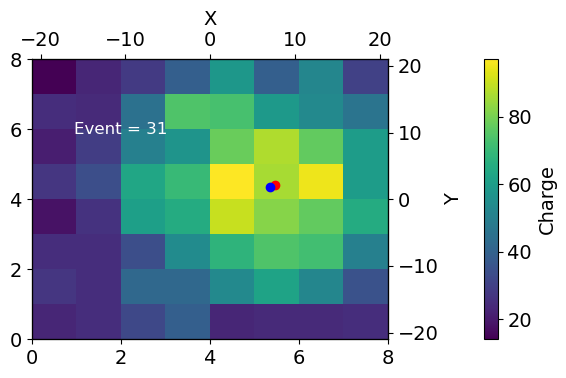

In [90]:
plot_image(dfi, df2c,  sel_events[20], x_spatial, y_spatial, figsize=(6, 4))